# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [2]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:6].values

In [3]:
training_set

array([[325.25, 332.83, 324.97, '663.59', '7,380,500'],
       [331.27, 333.87, 329.08, '666.45', '5,749,400'],
       [329.83, 330.75, 326.89, '657.21', '6,590,300'],
       ...,
       [793.7, 794.23, 783.2, '785.05', '1,153,800'],
       [783.33, 785.93, 778.92, '782.79', '744,300'],
       [782.75, 782.78, 770.41, '771.82', '1,770,000']], dtype=object)

### Feature Scaling

In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

c:\Projects_H.W\learning_machine_class\.venv\Lib\site-packages\sklearn\utils\_param_validation.py:14: UserWarning: A NumPy version >=1.25.2 and <2.6.0 is required for this version of SciPy (detected version 1.24.3)
  from scipy.sparse import csr_matrix, issparse


ModuleNotFoundError: No module named 'numpy.exceptions'

### Creating a data structure with 60 timesteps and 1 output

In [ ]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0:5])
    y_train.append(training_set_scaled[i, 0:5])
X_train, y_train = np.array(X_train), np.array(y_train)

In [6]:
X_train

array([[[0.08581368, 0.09044931],
        [0.09701243, 0.09823458],
        [0.09433366, 0.09408623],
        ...,
        [0.07846566, 0.0783452 ],
        [0.08034452, 0.08330808],
        [0.08497656, 0.08921806]],

       [[0.09701243, 0.09823458],
        [0.09433366, 0.09408623],
        [0.09156187, 0.08800576],
        ...,
        [0.08034452, 0.08330808],
        [0.08497656, 0.08921806],
        [0.08627874, 0.08283452]],

       [[0.09433366, 0.09408623],
        [0.09156187, 0.08800576],
        [0.07984225, 0.06106986],
        ...,
        [0.08497656, 0.08921806],
        [0.08627874, 0.08283452],
        [0.08471612, 0.07970905]],

       ...,

       [[0.92106928, 0.93248977],
        [0.92438053, 0.9389112 ],
        [0.93048218, 0.94413926],
        ...,
        [0.95475854, 0.96863161],
        [0.95204256, 0.96616912],
        [0.95163331, 0.96688892]],

       [[0.92438053, 0.9389112 ],
        [0.93048218, 0.94413926],
        [0.9299055 , 0.9439309 ],
        .

In [7]:
y_train

array([[0.08627874, 0.08283452],
       [0.08471612, 0.07970905],
       [0.07454052, 0.07389377],
       ...,
       [0.95725128, 0.95844067],
       [0.93796041, 0.95033338],
       [0.93688146, 0.93421352]])

### Reshaping

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 5))

In [9]:
X_train

array([[[0.08581368, 0.09044931],
        [0.09701243, 0.09823458],
        [0.09433366, 0.09408623],
        ...,
        [0.07846566, 0.0783452 ],
        [0.08034452, 0.08330808],
        [0.08497656, 0.08921806]],

       [[0.09701243, 0.09823458],
        [0.09433366, 0.09408623],
        [0.09156187, 0.08800576],
        ...,
        [0.08034452, 0.08330808],
        [0.08497656, 0.08921806],
        [0.08627874, 0.08283452]],

       [[0.09433366, 0.09408623],
        [0.09156187, 0.08800576],
        [0.07984225, 0.06106986],
        ...,
        [0.08497656, 0.08921806],
        [0.08627874, 0.08283452],
        [0.08471612, 0.07970905]],

       ...,

       [[0.92106928, 0.93248977],
        [0.92438053, 0.9389112 ],
        [0.93048218, 0.94413926],
        ...,
        [0.95475854, 0.96863161],
        [0.95204256, 0.96616912],
        [0.95163331, 0.96688892]],

       [[0.92438053, 0.9389112 ],
        [0.93048218, 0.94413926],
        [0.9299055 , 0.9439309 ],
        .

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [11]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 5)))
regressor.add(Dropout(0.2))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Adding a second LSTM layer and some Dropout regularisation

In [13]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [14]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [15]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [ ]:
regressor.add(Dense(units = 5))

### Compiling the RNN

In [17]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [18]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 99ms/step - loss: 0.1336
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 128ms/step - loss: 0.0105
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 102ms/step - loss: 0.0065
Epoch 4/100


KeyboardInterrupt: 

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [ ]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:6].values

### Getting the predicted stock price of 2017

In [ ]:
dataset_total = pd.concat((dataset_train[['Open', 'High', 'Low', 'Close', 'Volume']], 
                            dataset_test[['Open', 'High', 'Low', 'Close', 'Volume']]), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,5)
inputs = sc.transform(inputs)


In [ ]:
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0:5])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 5))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 917ms/step


### Visualising the results

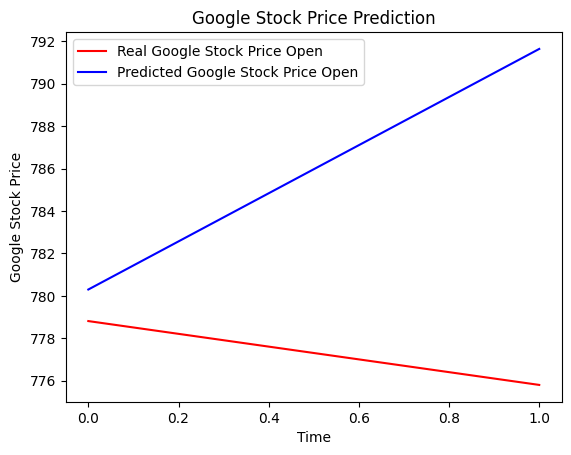

In [22]:
plt.plot(real_stock_price[0], color = 'red', label = 'Real Google Stock Price Open')
plt.plot(predicted_stock_price[0], color = 'blue', label = 'Predicted Google Stock Price Open')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

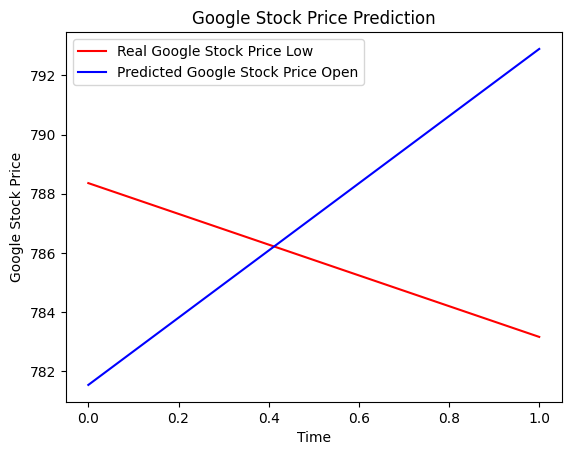

In [23]:
plt.plot(real_stock_price[1], color = 'red', label = 'Real Google Stock Price Low')
plt.plot(predicted_stock_price[1], color = 'blue', label = 'Predicted Google Stock Price Open')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

# Task
Update the existing RNN model to predict 'Open', 'High', 'Low', 'Close', and 'Volume' stock prices by:
1. Modifying data import for both training and test sets to include these five columns.
2. Reapplying `MinMaxScaler` on the updated datasets.
3. Recreating `X_train`, `y_train`, `inputs`, and `X_test` to reflect the new five features.
4. Updating the model's architecture by changing the first LSTM layer's `input_shape` and the final `Dense` output layer's `units` to 5.
5. Retraining the modified RNN model.
6. Generating predictions for all five stock values on the test data and inverse-transforming them.
7. Visualizing the real versus predicted values for each of the five stock price components with individual plots.

In [ ]:
# Plot for Open price
plt.figure(figsize=(10,6))
plt.plot(real_stock_price[:, 0], color='red', label='Real Open Price')
plt.plot(predicted_stock_price[:, 0], color='blue', label='Predicted Open Price')
plt.title('Google Stock Price Prediction - Open')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plot for High price
plt.figure(figsize=(10,6))
plt.plot(real_stock_price[:, 1], color='red', label='Real High Price')
plt.plot(predicted_stock_price[:, 1], color='blue', label='Predicted High Price')
plt.title('Google Stock Price Prediction - High')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plot for Low price
plt.figure(figsize=(10,6))
plt.plot(real_stock_price[:, 2], color='red', label='Real Low Price')
plt.plot(predicted_stock_price[:, 2], color='blue', label='Predicted Low Price')
plt.title('Google Stock Price Prediction - Low')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plot for Close price
plt.figure(figsize=(10,6))
plt.plot(real_stock_price[:, 3], color='red', label='Real Close Price')
plt.plot(predicted_stock_price[:, 3], color='blue', label='Predicted Close Price')
plt.title('Google Stock Price Prediction - Close')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plot for Volume
plt.figure(figsize=(10,6))
plt.plot(real_stock_price[:, 4], color='red', label='Real Volume')
plt.plot(predicted_stock_price[:, 4], color='blue', label='Predicted Volume')
plt.title('Google Stock Price Prediction - Volume')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.legend()
plt.show()